In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
#Save .CSV to df
df = pd.read_csv(r'C:\Users\dre2\Desktop\personal docs\WGU\D212\Task2\churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#Check for nulls or missing values
nulls = df.isnull().any()
print(nulls)

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService          True
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

<h2>Create dataframe of selected features to run regress on</h2>

In [15]:
df = df[['Tenure', 'Age', 'Income', 'Children', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Churn']]
df.head()

,Tenure,Age,Income,Children,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Churn
0,6.795513,68,28561.99,0,7.978323,1,172.455519,904.536110,No
1,1.156681,27,21704.77,1,11.699080,1,242.632554,800.982766,Yes
2,15.754144,50,9609.57,4,10.752800,1,159.947583,2054.706961,No
3,17.087227,48,18925.23,1,14.913540,0,119.956840,2164.579412,No
4,1.670972,83,40074.19,0,8.147417,1,149.948316,271.493436,Yes


In [5]:
df.to_csv(r'C:\Users\dre2\Desktop\personal docs\WGU\D212\Task2\churn_clean_exported.csv')

In [6]:
#Save features to x
x = df[['Tenure', 'Age', 'Income', 'Children', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

#Transform and standardize features
f_standard = StandardScaler().fit_transform(x)


<h2>Call pca method and set fit to standard</h2>

In [7]:
pca = PCA().fit(f_standard)
print(pca.components_)

[[ 7.05580539e-01  1.67192034e-03  4.16363282e-03  1.43218516e-02
   5.91029218e-03  1.72602186e-02  4.04758726e-02  7.07078294e-01]
 [-1.29057634e-03 -5.71187103e-01  2.97271262e-01  6.26970982e-01
  -1.31860535e-01  1.00082411e-01 -4.05925394e-01  1.00845206e-02]
 [ 3.93562487e-02  4.02742710e-01  2.47114965e-01 -2.29166359e-01
  -6.75963189e-01  2.19281760e-01 -4.66427726e-01 -1.00410497e-02]
 [-2.19026725e-02  2.31234533e-01  2.29066888e-01  1.35626613e-01
   3.49038076e-01  8.54949748e-01  1.48962928e-01 -1.51010462e-02]
 [-2.74900694e-02  4.95974676e-02  8.24844171e-01 -9.67615968e-03
  -8.89671172e-02 -2.80702232e-01  4.79172216e-01  2.81957068e-03]
 [-4.06858028e-02  1.75009035e-01 -3.38683890e-01  5.32606355e-01
  -5.36247035e-01  8.55925236e-02  5.23869084e-01  3.79693228e-03]
 [ 1.77208961e-02  6.51524134e-01  5.47672365e-02  5.01559833e-01
   3.29162505e-01 -3.52905372e-01 -2.96146807e-01 -6.88966748e-03]
 [-7.05266423e-01  2.23523949e-02 -9.39226611e-04 -2.15650091e-02
   

<h2>Create scree plot and visualize to determine total # of components</h2>

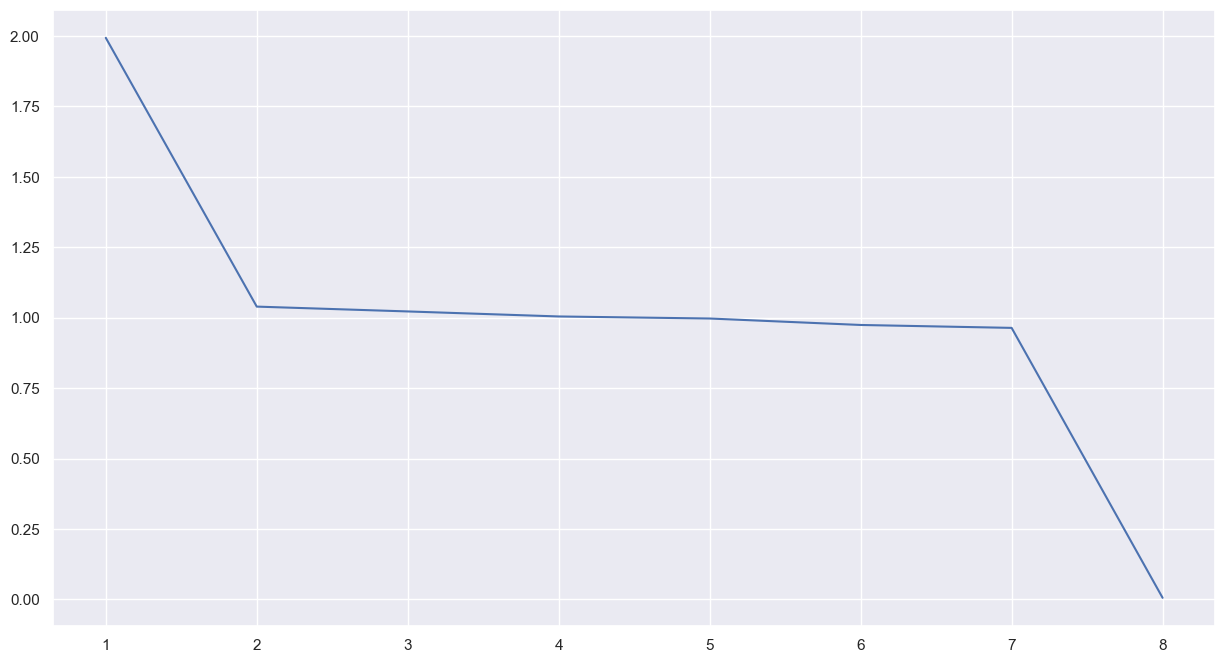

In [8]:
def screeplot(pca, standardized_values):
    y = np.std(pca.transform(standardized_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y)
  #  plt.xticks(x, [str(i) for i in x])
plt.show()

screeplot(pca, f_standard)

In [9]:
def PCA_results(pca, standardized_data, out=True):
    names = ['PC ' + str(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    a = list(np.std(pca.transform(standardized_data), axis = 0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    columns = pd.MultiIndex.from_tuples([('standard_deviation', 'Standard Deviation'),
                                        ('proportion_of_variation', 'Proportion of Variation'),
                                        ('cumulative_proportion', 'Cumulative Proportion')])
    results = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print()
    return results
results = PCA_results(pca, f_standard)
results.standard_deviation**2

,Standard Deviation
PC 1,1.993687
PC 2,1.039326
PC 3,1.022185
PC 4,1.004341
PC 5,0.997063
PC 6,0.974133
PC 7,0.963798
PC 8,0.005468


In [10]:
#Total variance captured by principal components
np.sum(results.standard_deviation**2)

Standard Deviation    8.0
dtype: float64

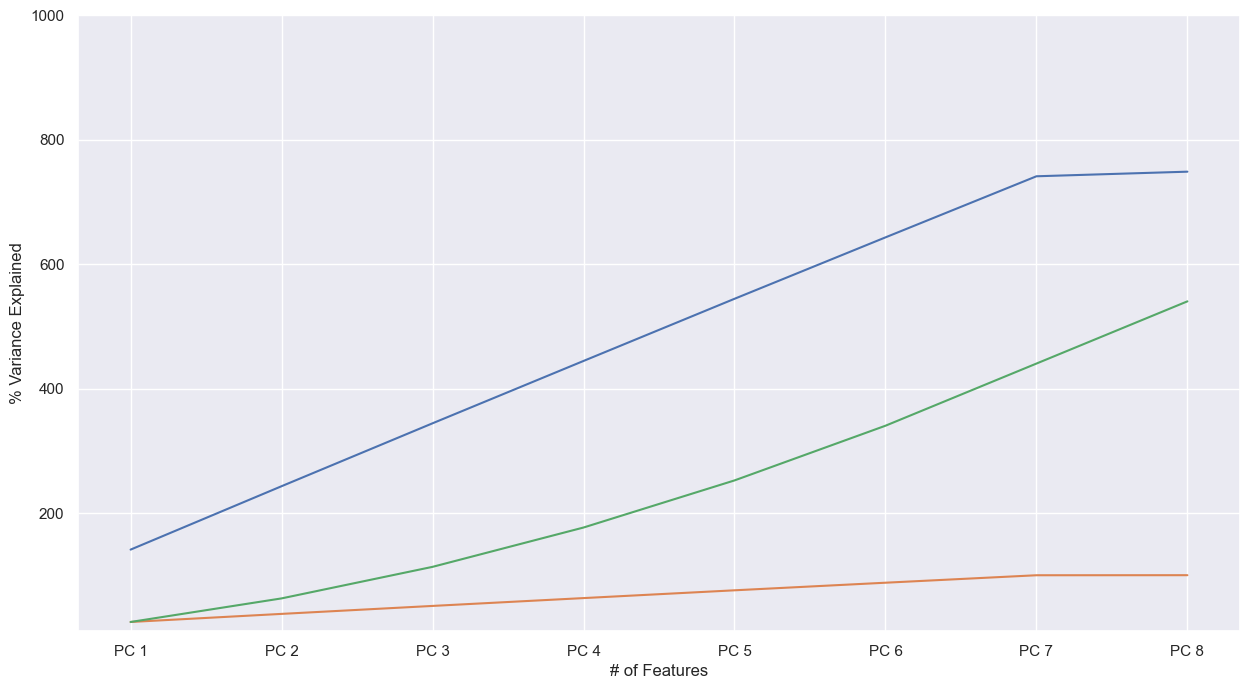

In [14]:
var = np.cumsum(np.round(results, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.ylim(10,1000)
# plt.style.context('seaborn-whitegrid')
plt.plot(var)